<a href="https://colab.research.google.com/github/victorialarrazolo/USaccidentsanaysis/blob/main/USaccidentsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accidents in the United States Analysis 


In [17]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  date
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [18]:
# Define lists of states, colors, linestyles, month order, day_order, and hour_order
# For this notebook, we will focus on the following three states: DE, FL, & CA
state_lst=['DE','FL','CA']
state_lst_full=['Delaware','Florida','California']

# We will focus on accident severities 2, 3 & 4
severity_lst=[2,3,4]

# Set a list of colors, markers and linestyles for plotting
color_lst=['r','b','k']
marker_lst=['D','o','*']
linestyle_lst=['dashed','dashdot','solid']

# Set a list of month, weekday, hour for reindex purpose and time_duraction to clear the accident
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

In [8]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [22]:
# read & load the dataset into pandas dataframe
df = pd.read_csv('/content/us-accidents/US_Accidents_Dec20_updated.csv')
df = df[df.State.isin(state_lst)]


In [21]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1012,A-2717612,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,21101.0,US Highway 50,L,Echo Lake,El Dorado,CA,95721,US,US/Pacific,KTVL,2016-03-22 18:53:00,28.9,NaN,85.0,30.18,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1013,A-2717613,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,NaN,I-680 N,R,San Jose,Santa Clara,CA,95116,US,US/Pacific,KRHV,2016-03-22 18:48:00,57.2,NaN,63.0,NaN,10.0,WNW,17.3,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1014,A-2717614,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 19:53:00,57.0,NaN,64.0,30.24,10.0,NW,8.1,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
1015,A-2717615,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 21:53:00,55.0,NaN,67.0,30.26,10.0,NW,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1016,A-2717616,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,14664.0,Latrobe Rd,R,Sloughhouse,Sacramento,CA,95683-9709,US,US/Pacific,KMHR,2016-03-22 20:45:00,55.4,NaN,51.0,30.23,10.0,NNW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [23]:
# Extract year, month, day, hour, & weekday information

# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

# Check the dataframe
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
1012,A-2717612,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,21101.0,US Highway 50,L,Echo Lake,El Dorado,CA,95721,US,US/Pacific,KTVL,2016-03-22 18:53:00,28.9,NaN,85.0,30.18,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Mar,22,18,Tue,360.0
1013,A-2717613,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,NaN,I-680 N,R,San Jose,Santa Clara,CA,95116,US,US/Pacific,KRHV,2016-03-22 18:48:00,57.2,NaN,63.0,NaN,10.0,WNW,17.3,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Mar,22,19,Tue,360.0
1014,A-2717614,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 19:53:00,57.0,NaN,64.0,30.24,10.0,NW,8.1,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,Mar,22,20,Tue,360.0
1015,A-2717615,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,NaN,I-580 W,R,Berkeley,Alameda,CA,94710,US,US/Pacific,KOAK,2016-03-22 21:53:00,55.0,NaN,67.0,30.26,10.0,NW,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,Mar,22,21,Tue,360.0
1016,A-2717616,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,14664.0,Latrobe Rd,R,Sloughhouse,Sacramento,CA,95683-9709,US,US/Pacific,KMHR,2016-03-22 20:45:00,55.4,NaN,51.0,30.23,10.0,NNW,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,Mar,22,21,Tue,360.0


findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.


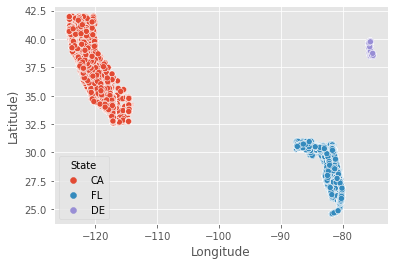

In [24]:
# Visualization: map of accidents by state
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [25]:
# Check the beginning and end date of this dataset
print('This dataset contains data beween {} and {}.'.format(df.Start_Time.min(),df.Start_Time.max()))

This dataset contains data beween 2016-03-22 18:53:11 and 2020-12-31 22:40:00.


In [26]:
# Find out how many days (Monday-Sunday) between the beginning and end of this dataset.

calendar_weekday_num=[]

d1=df.Start_Time.min()
d2=df.Start_Time.max()

for i in range(7):

    count = 0

    for d_ord in range(d1.toordinal(), d2.toordinal()+1):
        d = date.fromordinal(d_ord)
        if (d.weekday() == i):
            count += 1
    calendar_weekday_num.append(count)

print('Number of days for Monday-Sunday: {}.'.format(calendar_weekday_num))
print('Total number of days between {} and {}: {} days.'.format(d1,d2,sum(calendar_weekday_num)))


Number of days for Monday-Sunday: [249, 250, 250, 250, 249, 249, 249].
Total number of days between 2016-03-22 18:53:11 and 2020-12-31 22:40:00: 1746 days.


In [27]:
# Find out how many unique days in the dataset
allday_lst=df.Start_Time.astype(str).str.split(' ')
allday_lst2=[item[0] for item in allday_lst]

print('For the three states of New Jersey, Pennsylvania, & New York in this dataset:')
print('There are {} total accidents.'.format(df.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))

For the three states of New Jersey, Pennsylvania, & New York in this dataset:
There are 604171 total accidents.
There are 604171 total days.
There are 1654 unique days.
On average, there are 365 accidents per day.


In [28]:
# For each state, find out how many unique days for each weekday/weekend

# Initialize an empty list to hold the number of days for each weekday/weekend for the three states
weekday_num_state=[]

# Run a for loop for the list of states: NJ, PA, & NY
for state in state_lst:
    
    # Initialize an empty list to hold the number of days for each weekday
    weekday_num=[]
    
    # Run a for loop for the whole week
    for weekday in weekday_lst:
        
        # Slice the dataframe for specific state & weekday
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        # Extract the first item which is the day information
        day_lst2=[item[0] for item in day_lst1]
        
        # Append the day into the list weekday_num
        weekday_num.append(len(set(day_lst2)))

    # Append the day with state information encoded into the list weekday_num_state
    weekday_num_state.append(weekday_num)

print('For the states of {}, here is the list of numbers of weekdays (Mon-Sun): {}.'.format(state_lst,weekday_num_state))

For the states of ['DE', 'FL', 'CA'], here is the list of numbers of weekdays (Mon-Sun): [[137, 129, 127, 120, 128, 73, 78], [223, 224, 223, 225, 224, 217, 220], [237, 235, 238, 238, 234, 230, 233]].


In [29]:
# Run a for loop for each state to find out the percentage of days with accidents during this period of time in the data set
day_pct_lst=[]
for i,state in enumerate(state_lst):
    day_pct=[round(int(item1)/int(item2),2)*100 for item1,item2 in zip(weekday_num_state[i],calendar_weekday_num)]
    day_pct_lst.append(day_pct)
    print('For the state of {}, the percentage of days with accident during this period in the data set: {}%.'.format(state_lst[i], day_pct))

print(day_pct_lst)

For the state of DE, the percentage of days with accident during this period in the data set: [55.00000000000001, 52.0, 51.0, 48.0, 51.0, 28.999999999999996, 31.0]%.
For the state of FL, the percentage of days with accident during this period in the data set: [90.0, 90.0, 89.0, 90.0, 90.0, 87.0, 88.0]%.
For the state of CA, the percentage of days with accident during this period in the data set: [95.0, 94.0, 95.0, 95.0, 94.0, 92.0, 94.0]%.
[[55.00000000000001, 52.0, 51.0, 48.0, 51.0, 28.999999999999996, 31.0], [90.0, 90.0, 89.0, 90.0, 90.0, 87.0, 88.0], [95.0, 94.0, 95.0, 95.0, 94.0, 92.0, 94.0]]


findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.


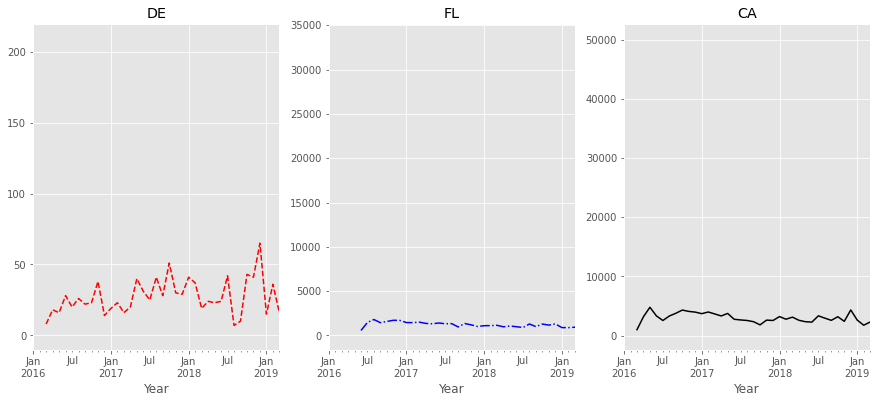

In [30]:
# Time series analysis, resample by month

# Set the start_time as the index for resampling purpose

df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    # Set the limits and labels
    plt.xlim('2016','2019-Mar')
    plt.xlabel('Year')
    plt.title('{}'.format(state))

plt.show()

# Reset the index back for further data analysis
df.reset_index(inplace=True)

In [31]:
df.Severity.value_counts().sort_values(ascending=False)

2    545183
3     32751
4     17747
1      8490
Name: Severity, dtype: int64

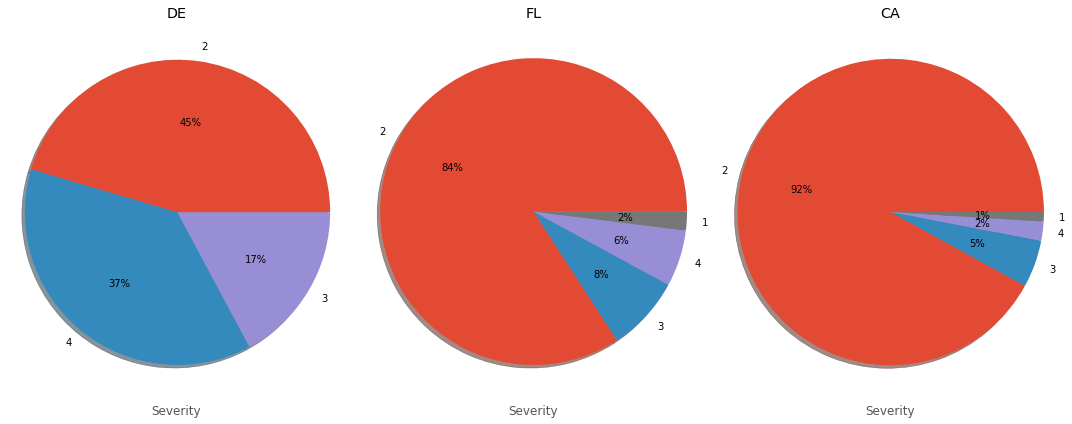

In [32]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

State list: ['DE', 'FL', 'CA']; Severity list: [2, 3, 4].


<Figure size 360x432 with 0 Axes>

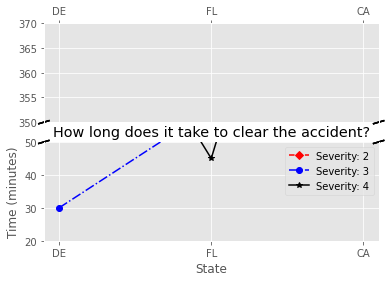

In [33]:
# Find the median time to clear an accident for each state; for each of the following Severity (2,3,4)

# Initialize median_lst_state_severity
median_lst_state_severity=[]

# Run a for loop for each weather condition
for i,severity in enumerate(severity_lst):
    # Initialize median_lst_state
    median_lst_state=[]
    
    # Run a for loop for each state
    for j,state in enumerate(state_lst):        
        
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)]

        # Calculate 25, 50, and 75 quantile and interquantile range
        df_25=df_temp[td].quantile(.25)
        df_50=df_temp[td].quantile(.5)
        df_75=df_temp[td].quantile(.75)
        df_iqr=df_75-df_25
        # print('1Q: {}; 3Q: {}; IQR: {}.'.format(df_25,df_75,df_iqr))
        
        # Convert the series to a list
        df_temp_lst=df_temp[td].tolist()
        
        # Run a list comprehension to remove outliers and fill with median
        # Define criteria for outlier: n*iqr
        n=3
        
        df_temp_lst=[item if ((item >= df_25 - n * df_iqr) & (item <= df_75 + n * df_iqr)) else df_50 for item in df_temp_lst]
        
        # Convert back to pandas series
        df_temp_lst=pd.Series(df_temp_lst)
        
        # Extract the median after outlier manipulation, and append it to the list median_lst_state
        median_lst_state.append(df_temp_lst.median())
        
    median_lst_state_severity.append(median_lst_state)   
        
print('State list: {}; Severity list: {}.'.format(state_lst,severity_lst))


# Set the size of the figure
fig= plt.figure(figsize=(5,6))

x_ticks=np.arange(len(median_lst_state_severity))

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

for i in range(len(median_lst_state_severity)):
    
    # Assign the sublist to pts
    pts=median_lst_state_severity[i]
    
    # If we were to simply plot pts, we'd lose most of the interesting
    # details due to the outliers. So let's 'break' or 'cut-out' the y-axis
    # into two portions - use the top (ax) for the outliers, and the bottom
    # (ax2) for the details of the majority of our data
    


    # plot the same data on both axes
    ax.plot(x_ticks, pts,linestyle=linestyle_lst[i], color=color_lst[i], marker=marker_lst[i])
    ax2.plot(x_ticks, pts,linestyle=linestyle_lst[i], color=color_lst[i], marker=marker_lst[i])
    

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(350, 370)  # outliers only
    ax2.set_ylim(20, 50)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs,label='_nolegend_')        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs,label='_nolegend_')  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs,label='_nolegend_')  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs,label='_nolegend_')  # bottom-right diagonal

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'       
   

# Set labels, limit, legend, title and xticks
plt.xlabel('State')
plt.ylabel('Time (minutes)')

ax2.legend(['Severity: 2','Severity: 3','Severity: 4'],loc="best")

plt.xticks(np.arange(len(median_lst_state_severity)),(state_lst))


plt.title('How long does it take to clear the accident?')

plt.show()


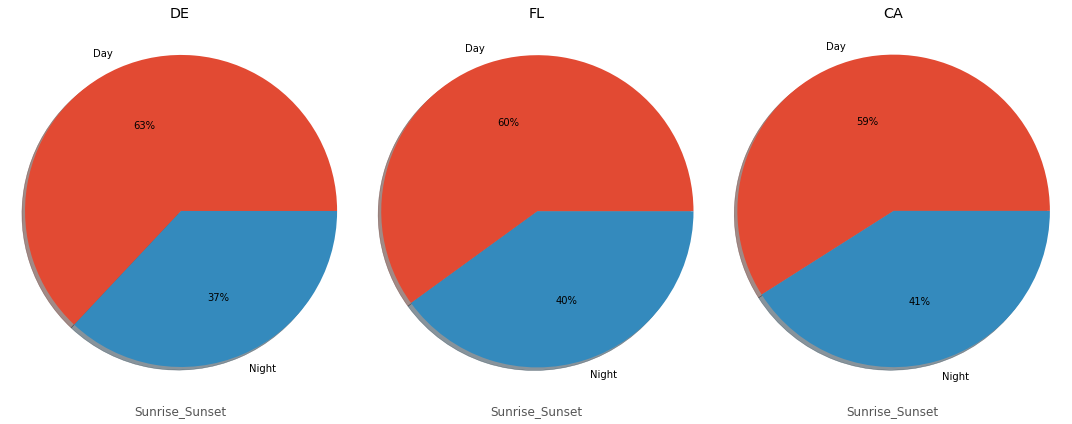

In [34]:
# The day or night when accidents occurred for each state
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()


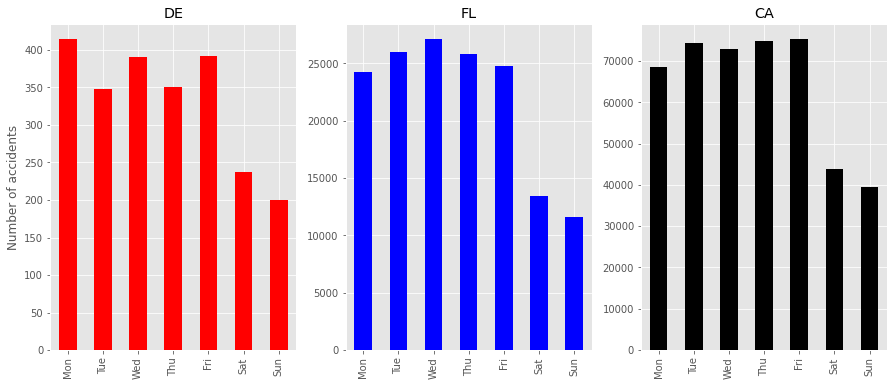

In [35]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY (for the whole dataset)
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar',color=color_lst[i]).set_title(state)
    plt.xlabel('')
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

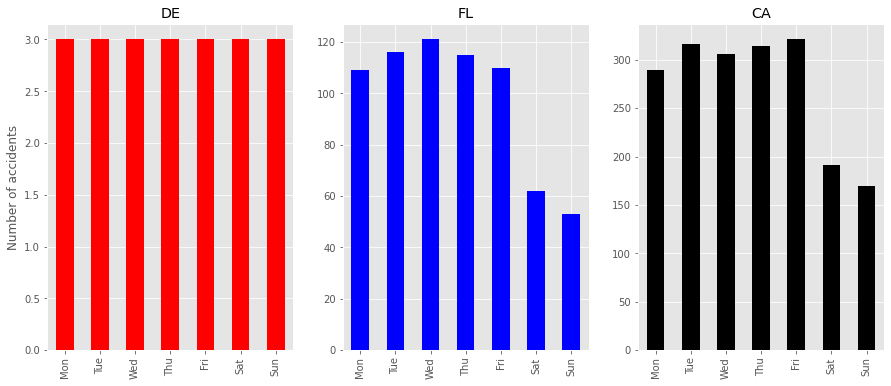

In [36]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Divide the total number of accidents by the number of unique days

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Remove xlabels
    plt.xlabel('')
    
    # Replace the xticks with weekday
    plt.xticks(np.arange(7),weekday_lst)
       
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')


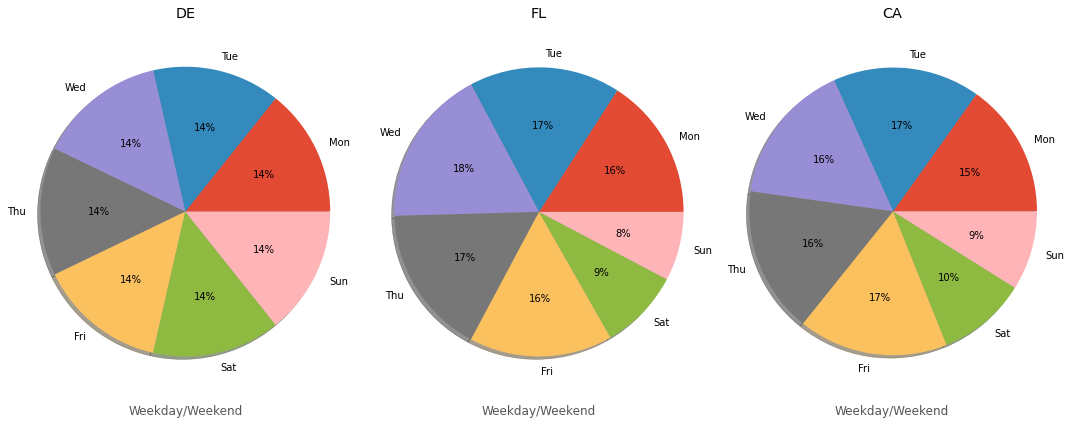

In [37]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Start_Weekday'
fig_x=len(state_lst)


# Divide the total number of accidents by the number of unique days

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    # df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)

        

plt.tight_layout()
plt.show()

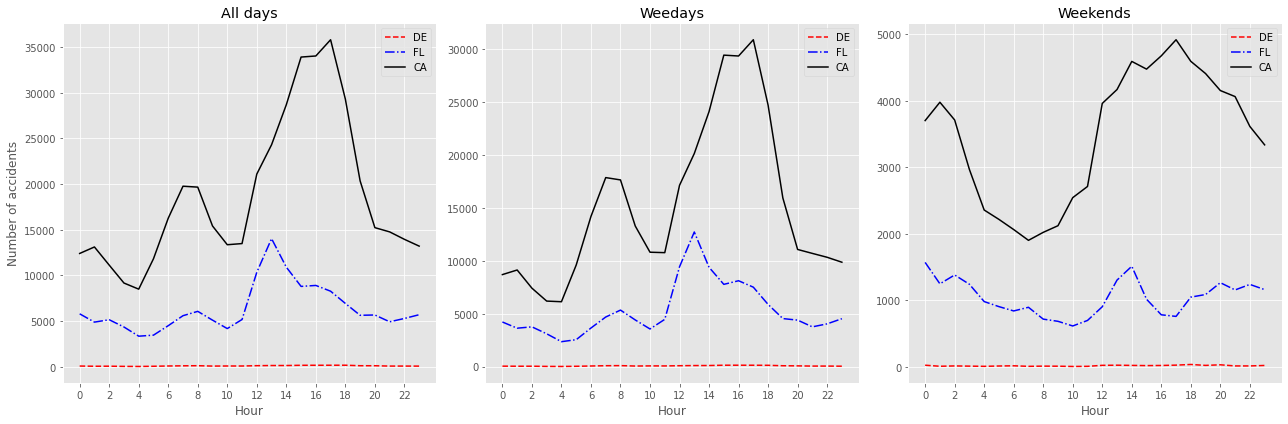

In [38]:
# Hourly distribution of accidents on all days, weekdays, & weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(18,6))

# Plot all data together

plt.subplot(1, 3, 1)

# Plot the states of New Jersey, Pennsylvania, & New York on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='DE'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[df['State']=='FL'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[df['State']=='CA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.legend(['DE','FL','CA'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of New Jersey, Pennsylvania, & New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='DE') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[(df['State']=='FL') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[(df['State']=='CA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.legend(['DE','FL','CA'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='DE') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
# Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='FL') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
# Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='CA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.legend(['DE','FL','CA'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()

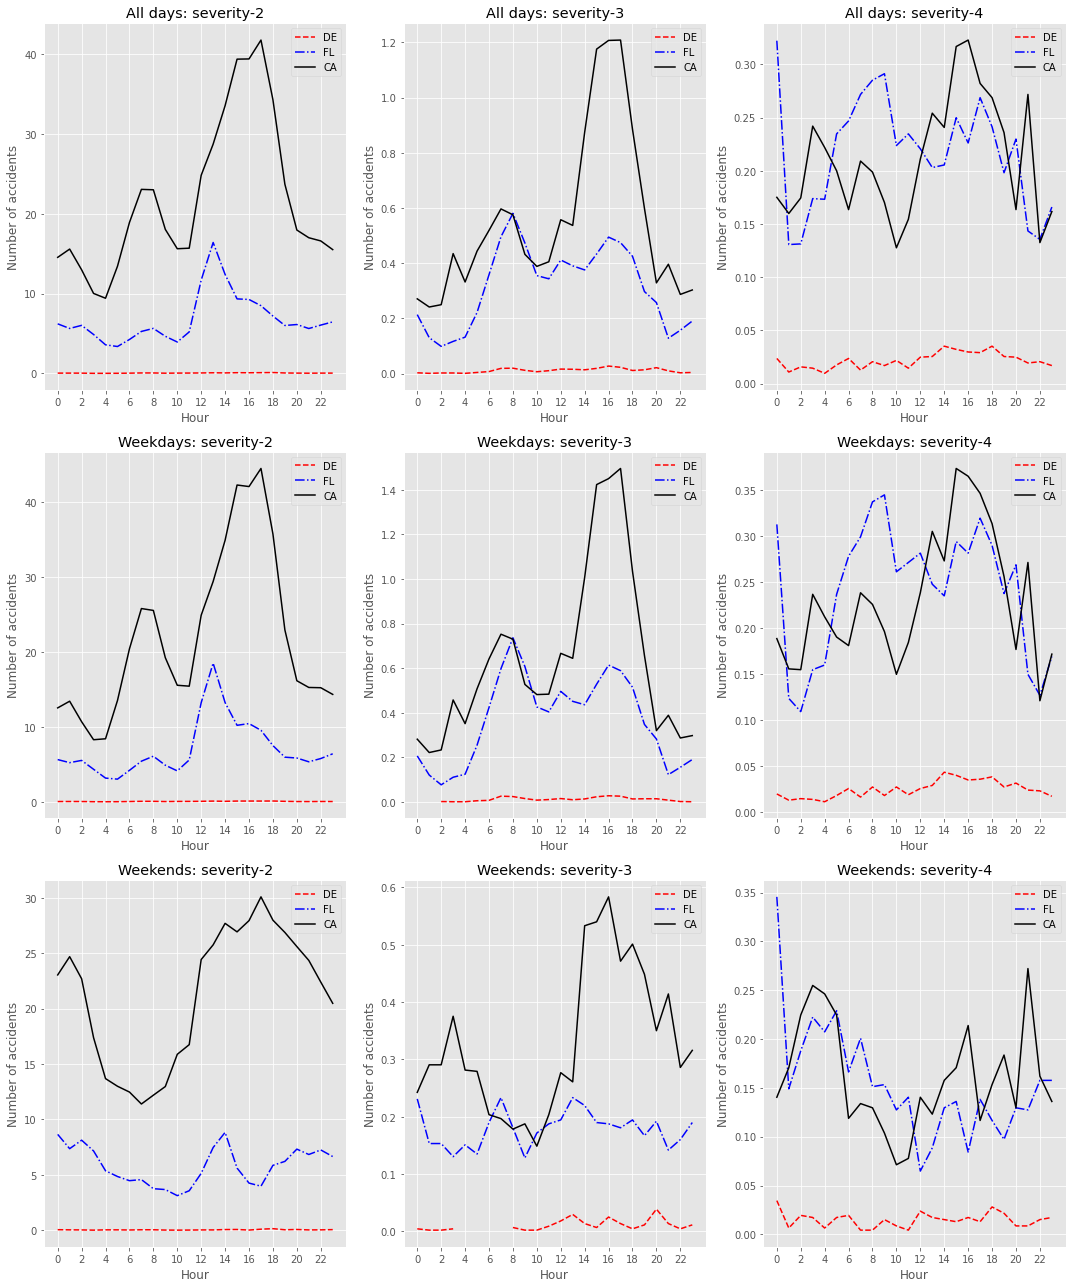

In [39]:
# Hourly distribution of accidents (severity 2, 3, & 4) per day on all days, weekdays, & weekends in NJ, PA & NY

feature='Severity'
feature2=['All days', 'Weekdays','Weekends']
severity_lst=[2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)
fig_z=len(feature2)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_z,6*fig_y))

# Run a for loop for each weather condition and each state for all days together
for i,severity in enumerate(severity_lst):

    ### ###
    # All days
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1)
    
    # Run a for loop for each state, all days
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
        
        
        # Divid the number of accidents by the number of week days, using list comprehension
        df_temp=df_temp/sum(weekday_num_state[i])
        
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    plt.legend(['DE','FL','CA'])
    plt.title('All days'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))

    ### ###
    # Weekdays
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1+fig_y)
    
    # Run a for loop for each state, weekdays
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity) & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
           
                  
        # Divid the number of accidents by the number of weekdays (Mon-Fri), using list comprehension
        df_temp=df_temp/sum(weekday_num_state[i][:5])      

        
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    plt.legend(['DE','FL','CA'])
    plt.title('Weekdays'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))

    
    ### ###
    # Weekends
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1+fig_y+fig_y)
    
    # Run a for loop for each state, weekdays
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity) & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
          
                         
        # Divid the number of accidents by the number of week days, using list comprehension
        df_temp=df_temp/sum(weekday_num_state[i][5:])     
        
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    plt.legend(['DE','FL','CA'])
    plt.title('Weekends'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))
    
plt.tight_layout()
plt.show()


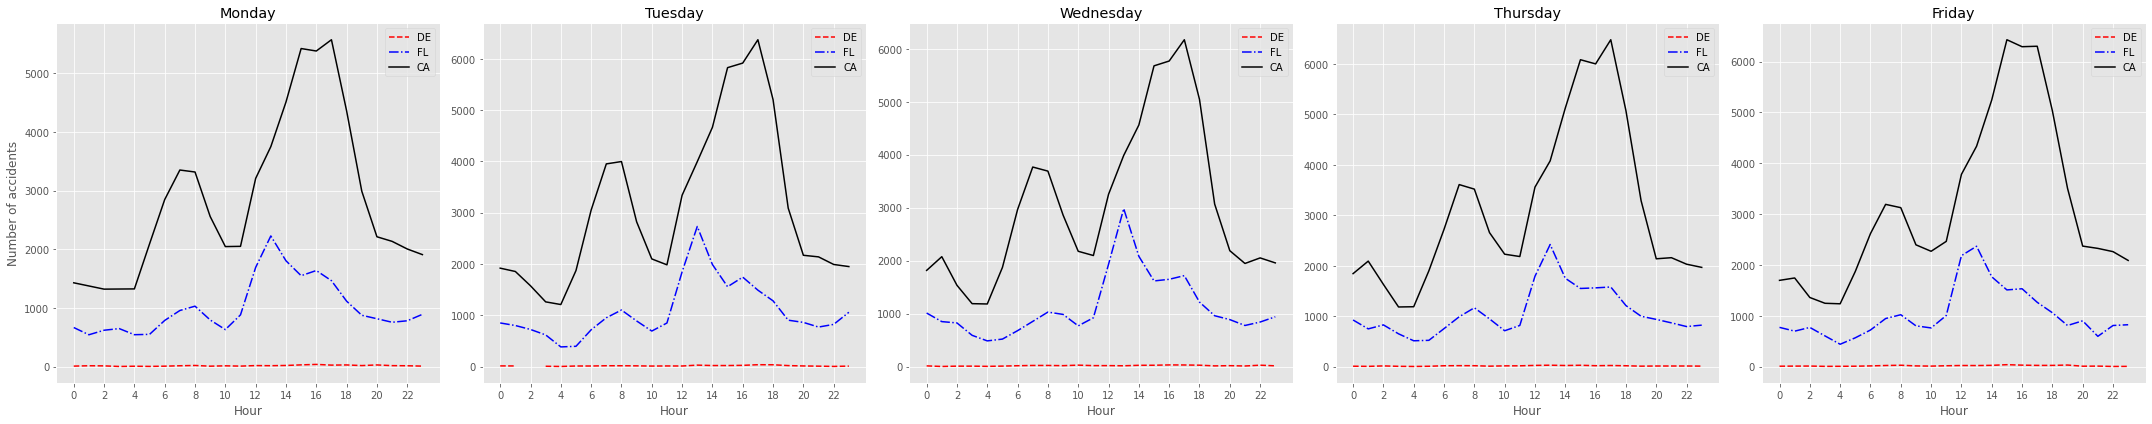

In [40]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(30,6))
n=5

# Make subplots on each weekday with a for loop
for i in range(n):
    plt.subplot(1, 5, i+1)
    # Plot the state of New Jersey on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='DE') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='FL') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='CA') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')
    
    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.legend(['DE','FL','CA'])
    plt.title(weekday_lst_full[i])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()


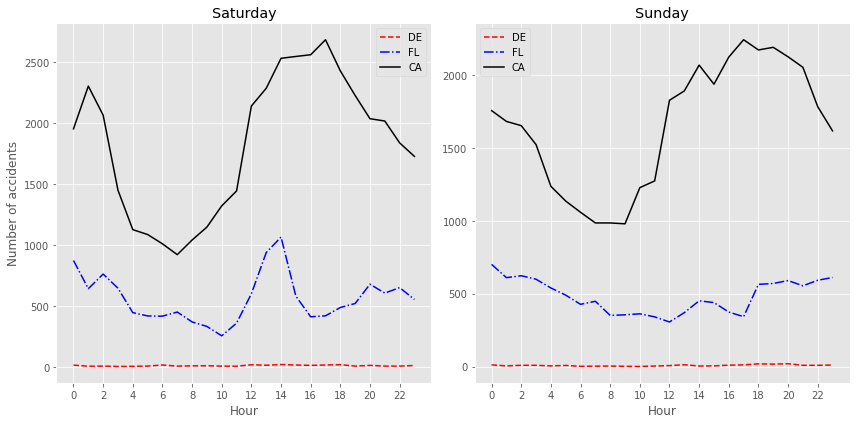

In [41]:
# Hourly distribution of accidents on weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(12,6))

# Make subplots on each weekday with a for loop
for i in range(2):
    # Set the subplot
    plt.subplot(1, 2, i+1)
    # Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='DE') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='FL') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='CA') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.legend(['DE','FL','CA'])
    plt.title(weekday_lst_full[i+5])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()


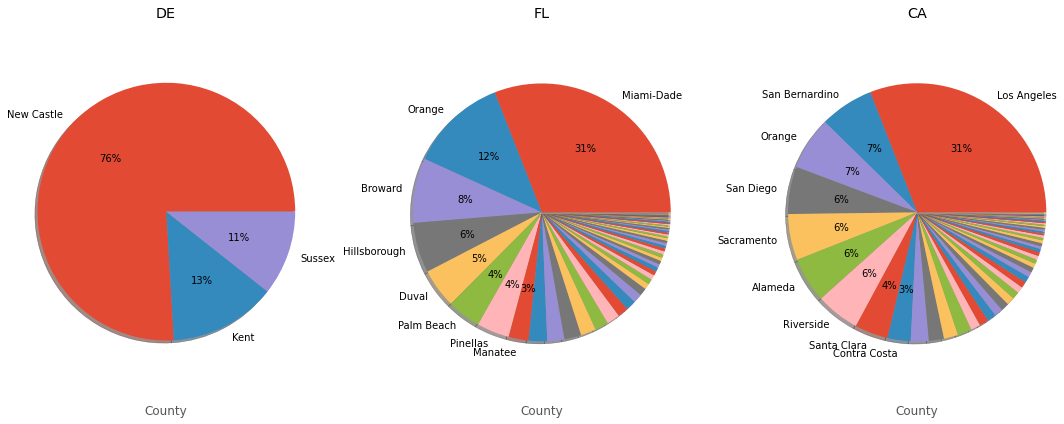

In [42]:
# The county distribution of accidents for each state
feature='County'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()


In [43]:
df[df['State']=='NJ']['City'].value_counts(normalize=True)

Series([], Name: City, dtype: float64)

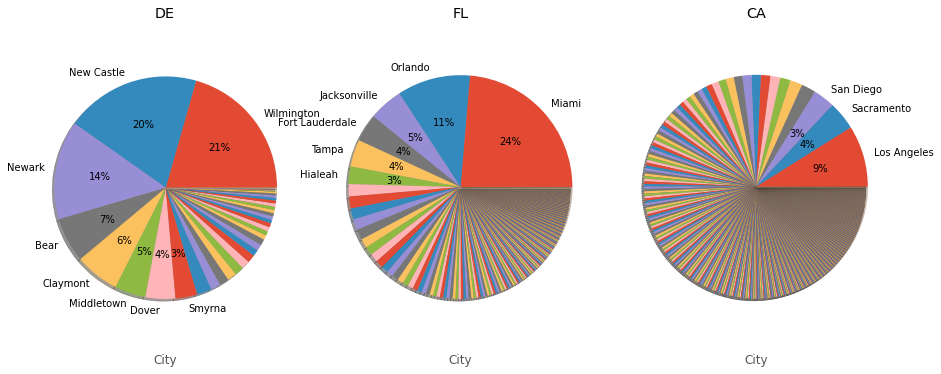

In [44]:
# The city distribution of accidents for each state
feature='City'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()


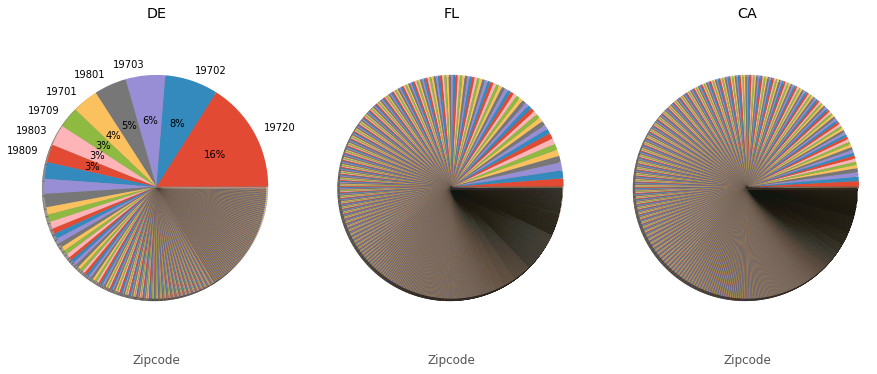

In [46]:
# The zip code distribution of accidents for each state
feature='Zipcode'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

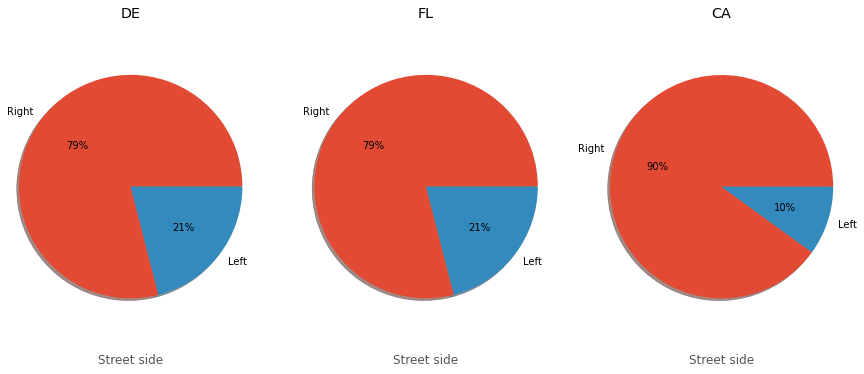

In [47]:
# The relative side of the street (Right/Left) in address field for each state.
# Set the size of the figure
fig= plt.figure(figsize=(15,6))
labels=['Right','Left']

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df_side=df[df['State']==state]['Side'].value_counts(normalize=True).round(2)[:2]

    plt.pie(df_side, labels=labels, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.xlabel('Street side')
    plt.title('{}'.format(state))

plt.show()

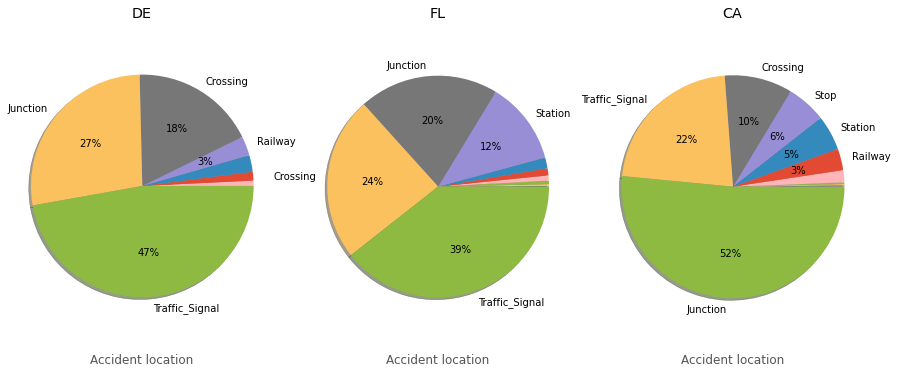

In [48]:
# The location of accidents for each state
# Where are the accidents?
feature='Accident location'

# Set the state as the index
df.set_index('State',drop=True,inplace=True)

# State is the index when selecting bool type data as df_bool
df_bool=df.select_dtypes(include=['bool'])

# Reset the index of the original data for other calculations
df.reset_index(inplace=True)

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()